# 策略

> 定期定額

In [1]:
import yfinance as yf

# 下載VTI的數據
VTI = yf.download('VTI', start='2010-01-01',end='2023-12-31')
VTI

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,56.860001,57.380001,56.840000,57.310001,44.335228,2251500
2010-01-05,57.340000,57.540001,57.110001,57.529999,44.505428,1597700
2010-01-06,57.500000,57.720001,57.410000,57.610001,44.567329,2120300
2010-01-07,57.549999,57.889999,57.290001,57.849998,44.752979,1656700
2010-01-08,57.700001,58.049999,57.560001,58.040001,44.899952,1650000
...,...,...,...,...,...,...
2023-12-22,236.589996,237.520004,235.639999,236.630005,236.630005,3661900
2023-12-26,236.979996,238.309998,236.860001,237.800003,237.800003,3829400
2023-12-27,238.000000,238.440002,237.470001,238.250000,238.250000,5103700


- - -

<img src="./14.png" height="600"/>

In [2]:
import pandas as pd
import numpy as np

# 找到每個月的第一個交易日
VTI['month'] = VTI.index.to_period('M')
first_days = VTI.groupby('month').first()

# 計算每個月的投資金額和購買的股數，並將股數四捨五入到最接近的整數
first_days['investment'] = 500
first_days['shares'] = (first_days['investment'] / first_days['Adj Close']).apply(np.floor)

# 計算累計的投資金額和股數
first_days['cumulative_investment'] = first_days['investment'].cumsum()
first_days['cumulative_shares'] = first_days['shares'].cumsum()

# 計算資產總額、總投入成本、當年報酬率和總報酬率
latest_prices = VTI.groupby('month')['Adj Close'].last()
first_days['total_value'] = first_days['cumulative_shares'] * latest_prices
first_days['total_cost'] = first_days['cumulative_investment']
first_days['annual_return'] = first_days['total_value'].pct_change(12) * 100  # 假設每年有12個月
first_days['total_return'] = (first_days['total_value'] / first_days['total_cost'] - 1) * 100

# 對於第一年的annual_return，使用第一年最後一天的價格與第一天的價格進行比較
first_year = first_days.index.year[0]
first_days.loc[first_days.index.year == first_year, 'annual_return'] = (first_days.loc[first_days.index.year == first_year, 'total_value'].iloc[-1] / first_days.loc[first_days.index.year == first_year, 'total_value'].iloc[0] - 1) * 100

# 建立一個新的DataFrame，按年份列出資產總額、總投入成本、持股總數、當年報酬率和總報酬率
first_days['year'] = first_days.index.year
annual_summary = first_days.groupby('year').last()[['total_value', 'total_cost', 'cumulative_shares', 'annual_return', 'total_return']]

annual_summary

,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6554.645996,6000,128.0,1316.962950,9.244100
2011,12305.587975,12000,238.0,87.738407,2.546566
2012,20290.835255,18000,337.0,64.891229,12.726863
2013,33586.442871,24000,418.0,65.525186,39.943512
2014,43679.499481,30000,483.0,30.050984,45.598332
2015,49279.901367,36000,543.0,12.821580,36.888615
2016,61739.711266,42000,603.0,25.283756,46.999313
2017,80793.986275,48000,651.0,30.862268,68.320805
2018,81269.016525,54000,691.0,0.587952,50.498179


<img src="./16.png" height="400"/>

- - -

<img src="./17.png" height="600"/>

In [3]:
import pandas as pd
import numpy as np

# 找到每個月的第一個交易日
VTI['month'] = VTI.index.to_period('M')
first_days = VTI.groupby('month').first()

# 計算每個月的投資金額和購買的股數，並將股數四捨五入到最接近的整數
first_days['investment'] = 500
first_days['shares'] = (first_days['investment'] / first_days['Adj Close']).apply(np.floor)

# 計算累計的投資金額和股數
first_days['cumulative_investment'] = first_days['investment'].cumsum()
first_days['cumulative_shares'] = first_days['shares'].cumsum()

# 計算資產總額、總投入成本、當年報酬率和總報酬率
latest_prices = VTI.groupby('month')['Adj Close'].last()
first_days['total_value'] = first_days['cumulative_shares'] * latest_prices
first_days['total_cost'] = first_days['cumulative_investment']
first_days['annual_return'] = first_days['total_value'].pct_change(12) * 100  # 假設每年有12個月
first_days['total_return'] = (first_days['total_value'] / first_days['total_cost'] - 1) * 100

# 對於第一年的annual_return，使用(投資現值 - 投資成本) / 投資成本 * 100%的公式
first_year = first_days.index.year[0]
first_days.loc[first_days.index.year == first_year, 'annual_return'] = ((first_days.loc[first_days.index.year == first_year, 'total_value'].iloc[-1] - first_days.loc[first_days.index.year == first_year, 'total_cost'].iloc[-1]) / first_days.loc[first_days.index.year == first_year, 'total_cost'].iloc[-1]) * 100

# 建立一個新的DataFrame，按年份列出資產總額、總投入成本、持股總數、當年報酬率和總報酬率
first_days['year'] = first_days.index.year
annual_summary = first_days.groupby('year').last()[['total_value', 'total_cost', 'cumulative_shares', 'annual_return', 'total_return']]
annual_summary

,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6554.645996,6000,128.0,9.244100,9.244100
2011,12305.587975,12000,238.0,87.738407,2.546566
2012,20290.835255,18000,337.0,64.891229,12.726863
2013,33586.442871,24000,418.0,65.525186,39.943512
2014,43679.499481,30000,483.0,30.050984,45.598332
2015,49279.901367,36000,543.0,12.821580,36.888615
2016,61739.711266,42000,603.0,25.283756,46.999313
2017,80793.986275,48000,651.0,30.862268,68.320805
2018,81269.016525,54000,691.0,0.587952,50.498179


- - -

寫成function

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
def get_annual_summary(stock_symbol, start_date):
    # 下載股票數據
    stock_data = yf.download(stock_symbol, start=start_date, end='2023-12-31')

    # 找到每個月的第一個交易日
    stock_data['month'] = stock_data.index.to_period('M')
    first_days = stock_data.groupby('month').first()

    # 計算每個月的投資金額和購買的股數，並將股數四捨五入到最接近的整數
    first_days['investment'] = 500
    first_days['shares'] = (first_days['investment'] / first_days['Adj Close'])

    # 計算累計的投資金額和股數
    first_days['cumulative_investment'] = first_days['investment'].cumsum()
    first_days['cumulative_shares'] = first_days['shares'].cumsum()

    # 計算資產總額、總投入成本、當年報酬率和總報酬率
    latest_prices = stock_data.groupby('month')['Adj Close'].last()
    first_days['total_value'] = first_days['cumulative_shares'] * latest_prices
    first_days['total_cost'] = first_days['cumulative_investment']
    first_days['annual_return'] = first_days['total_value'].pct_change(12) * 100  # 假設每年有12個月
    first_days['total_return'] = (first_days['total_value'] / first_days['total_cost'] - 1) * 100

    # 對於第一年的annual_return，使用(投資現值 - 投資成本) / 投資成本 * 100%的公式
    first_year = first_days.index.year[0]
    first_days.loc[first_days.index.year == first_year, 'annual_return'] = ((first_days.loc[first_days.index.year == first_year, 'total_value'].iloc[-1] - first_days.loc[first_days.index.year == first_year, 'total_cost'].iloc[-1]) / first_days.loc[first_days.index.year == first_year, 'total_cost'].iloc[-1]) * 100

    # 建立一個新的DataFrame，按年份列出資產總額、總投入成本、持股總數、當年報酬率和總報酬率
    first_days['year'] = first_days.index.year
    annual_summary = first_days.groupby('year').last()[['total_value', 'total_cost', 'cumulative_shares', 'annual_return', 'total_return']]
    
    return annual_summary


In [5]:
# 計算年化報酬率
def get_annual_return(annual_summary):
    Total = float(annual_summary['total_value'].iloc[-1])
    cost = float(annual_summary['total_cost'].iloc[-1])
    year = float(annual_summary.shape[0])
    return ((Total / cost) ** (1 / year) - 1)*100


<img src="./21.png" height="600"/>

In [6]:
TLT_annual=get_annual_summary('TLT', '2010-01-01')
TLT_annual

[*********************100%%**********************]  1 of 1 completed


,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6012.905681,6000,89.850121,0.215095,0.215095
2011,15447.579211,12000,172.260808,156.907060,28.729827
2012,21850.176549,18000,237.925439,41.447254,21.389870
2013,24486.654042,24000,307.825013,12.066161,2.027725
2014,37982.273663,30000,375.076900,55.114184,26.607579
2015,43185.559068,36000,434.230787,13.699247,19.959886
2016,49235.221002,42000,489.327030,14.008530,17.226717
2017,60030.546569,48000,546.439418,21.926022,25.063639
2018,65269.739756,54000,603.863989,8.727545,20.869888


In [7]:
get_annual_return(TLT_annual)

0.012763443981000933

In [8]:
QQQ_annual=get_annual_summary('QQQ', '2010-01-01')
QQQ_annual

[*********************100%%**********************]  1 of 1 completed


,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6991.332380,6000,144.760261,16.522206,16.522206
2011,13216.605452,12000,264.466489,89.042728,10.138379
2012,21732.444697,18000,368.182717,64.432878,20.735804
2013,36938.671681,24000,458.011779,69.970163,53.911132
2014,50729.271817,30000,527.770899,37.333774,69.097573
2015,61806.319146,36000,587.570424,21.835613,71.684220
2016,72625.192370,42000,644.663910,17.504477,72.917125
2017,103155.594084,48000,690.219473,42.038308,114.907488
2018,108494.886198,54000,726.862497,5.175960,100.916456


In [9]:
get_annual_return(QQQ_annual)

10.60553777352271

In [10]:
VOO_annual=get_annual_summary('VOO', '2010-01-01')
VOO_annual

[*********************100%%**********************]  1 of 1 completed


,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,2182.699633,2000,24.149766,9.134982,9.134982
2011,8235.617534,8000,89.423528,277.313370,2.945219
2012,15865.614530,14000,148.518822,92.646325,13.325818
2013,27938.995616,20000,197.556657,76.097784,39.694978
2014,38033.758393,26000,238.149075,36.131445,46.283686
2015,44570.216095,32000,275.427462,17.185937,39.281925
2016,56512.828124,38000,311.347593,26.795051,48.717969
2017,75494.978761,44000,341.557281,33.589101,71.579497
2018,77626.388147,50000,367.751544,2.823247,55.252776


In [11]:
get_annual_return(VOO_annual)

6.839972195755117

In [12]:
VT_annual=get_annual_summary('VT', '2010-01-01')
VT_annual

[*********************100%%**********************]  1 of 1 completed


,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6771.820800,6000,190.204122,12.863680,12.863680
2011,11864.477355,12000,360.298214,75.203652,-1.129355
2012,20375.723393,18000,528.295838,71.737218,13.198463
2013,31801.183345,24000,670.691011,56.073886,32.504931
2014,39055.795323,30000,794.455364,22.812396,30.185984
2015,44136.044861,36000,914.823907,13.007671,22.600125
2016,54267.898663,42000,1036.733562,22.955962,29.209283
2017,74255.410464,48000,1139.450182,36.831188,54.698772
2018,72380.812837,54000,1230.853708,-2.524527,34.038542


In [13]:
get_annual_return(VT_annual)

4.9255128639955625

In [14]:
VTI_annual=get_annual_summary('VTI', '2010-01-01')
VTI_annual

[*********************100%%**********************]  1 of 1 completed


,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6852.765856,6000,133.821724,14.212764,14.212764
2011,12885.172098,12000,249.209625,88.028781,7.376434
2012,21337.768992,18000,354.387982,65.599410,18.543161
2013,35437.779165,24000,441.040802,66.080058,47.657413
2014,46367.375100,30000,512.722042,30.841650,54.557917
2015,52500.739923,36000,578.489424,13.227759,45.835389
2016,65796.026436,42000,642.617258,25.323998,56.657206
2017,86415.588439,48000,696.296230,31.338613,80.032476
2018,87375.612139,54000,742.922095,1.110938,61.806689


In [15]:
get_annual_return(VTI_annual)

7.0078671424987915

- - -

<img src="./22.png" height="600"/>

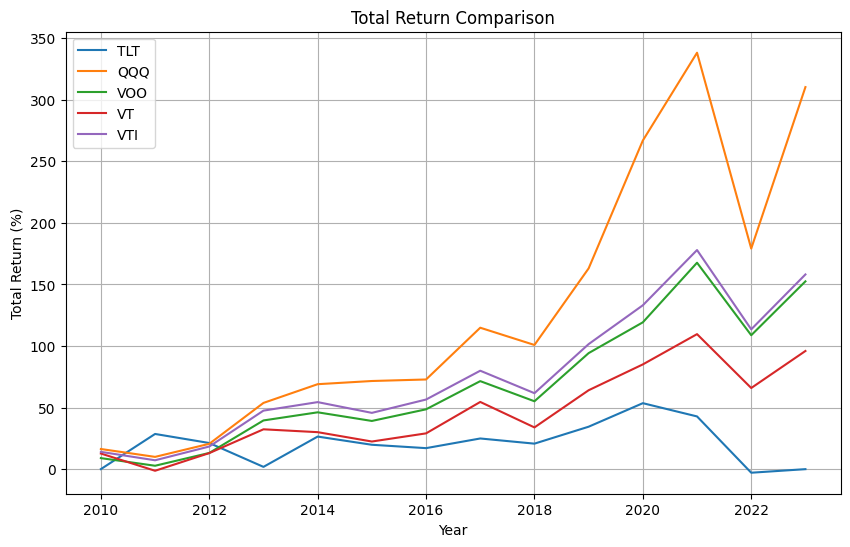

In [16]:
import matplotlib.pyplot as plt

# 合併所有的年度回報數據
annual_returns = pd.DataFrame({
    'TLT': TLT_annual['total_return'],
    'QQQ': QQQ_annual['total_return'],
    'VOO': VOO_annual['total_return'],
    'VT': VT_annual['total_return'],
    'VTI': VTI_annual['total_return']
})

# 繪製折線圖
plt.figure(figsize=(10, 6))
for column in annual_returns.columns:
    plt.plot(annual_returns.index, annual_returns[column], label=column)
plt.xlabel('Year')
plt.ylabel('Total Return (%)')
plt.title('Total Return Comparison')
plt.legend()
plt.grid(True)
plt.show()

# VIX買進策略

以VIX為基準，每次增加就買入的策略。

當VIX超過21的時候買入1000元的VTI，每次VIX增加5就再買入1000，直到VIX回到21就重新下一輪。

In [17]:
import yfinance as yf

# 下載VTI的數據
VIX = yf.download('^VIX', start='2010-01-01',end='2023-12-31')
import matplotlib.pyplot as plt
VIX

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,21.680000,21.680000,20.030001,20.040001,20.040001,0
2010-01-05,20.049999,20.129999,19.340000,19.350000,19.350000,0
2010-01-06,19.590000,19.680000,18.770000,19.160000,19.160000,0
2010-01-07,19.680000,19.709999,18.700001,19.059999,19.059999,0
2010-01-08,19.270000,19.270000,18.110001,18.129999,18.129999,0
...,...,...,...,...,...,...
2023-12-22,13.720000,13.960000,13.000000,13.030000,13.030000,0
2023-12-26,13.770000,13.800000,12.960000,12.990000,12.990000,0
2023-12-27,13.020000,13.040000,12.370000,12.430000,12.430000,0


In [18]:
VIX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.0
mean,18.717700,19.711814,17.762964,18.574679,18.574679,0.0
std,7.160846,7.817232,6.503621,7.110419,7.110419,0.0
min,9.010000,9.310000,8.560000,9.140000,9.140000,0.0
25%,13.782500,14.340000,13.230000,13.652500,13.652500,0.0
50%,16.920000,17.719999,16.129999,16.825000,16.825000,0.0
75%,21.740000,22.887499,20.687500,21.480000,21.480000,0.0
max,82.690002,85.470001,70.370003,82.690002,82.690002,0.0


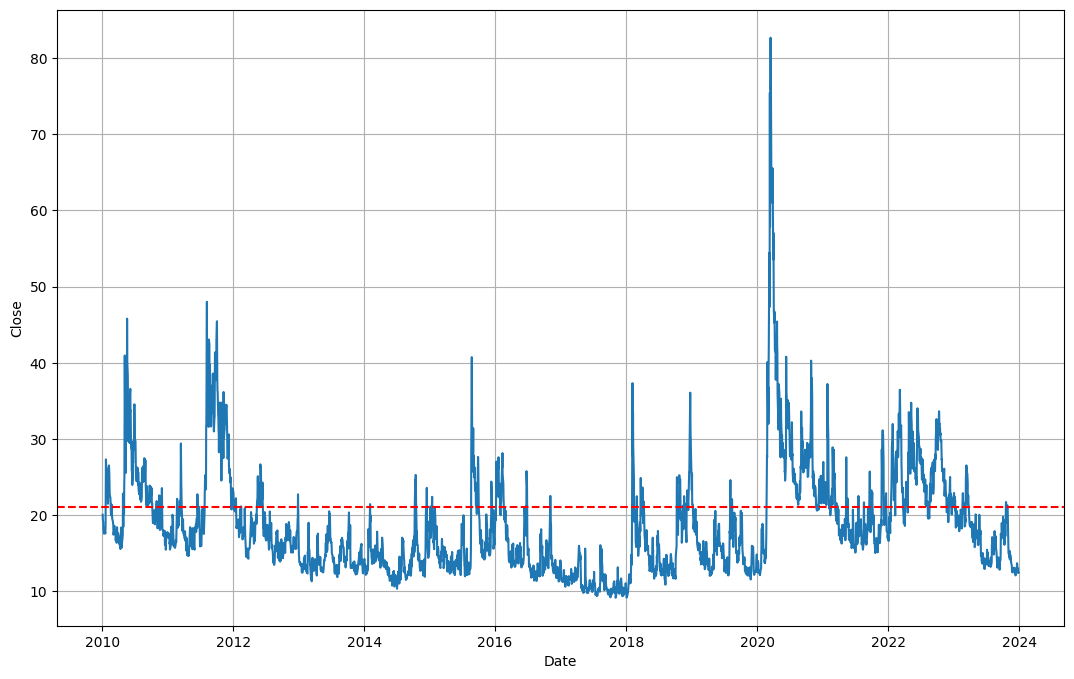

In [27]:
# Plotting the graph
plt.figure(figsize=(13,8))
plt.plot(VIX.index, VIX['Close'])

# Setting the x-axis label and y-axis label
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.axhline(y=21, color='r', linestyle='--')
# Displaying the graph
plt.show()

<img src="./31.png" height="600"/>

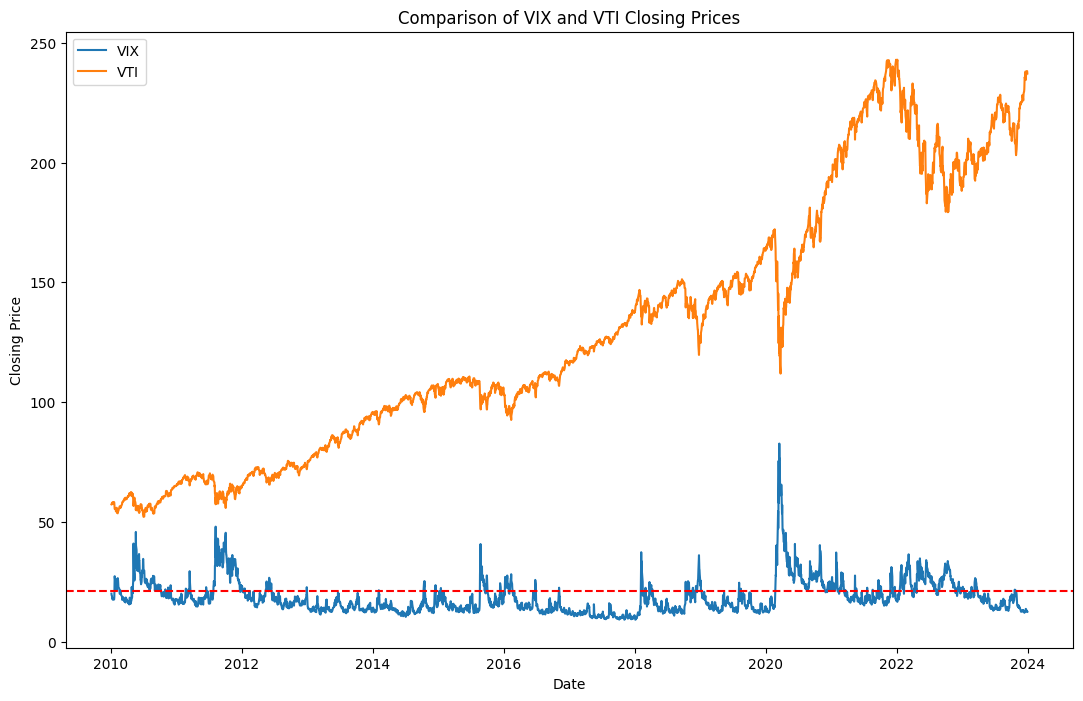

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,8))
# Plotting VIX and VTI closing prices
plt.plot(VIX.index, VIX['Close'], label='VIX')
plt.plot(VTI.index, VTI['Close'], label='VTI')


# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.axhline(y=21, color='r', linestyle='--')
plt.title('Comparison of VIX and VTI Closing Prices')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


In [31]:
VTI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 to 2023-12-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   Open       3522 non-null   float64  
 1   High       3522 non-null   float64  
 2   Low        3522 non-null   float64  
 3   Close      3522 non-null   float64  
 4   Adj Close  3522 non-null   float64  
 5   Volume     3522 non-null   int64    
 6   month      3522 non-null   period[M]
dtypes: float64(5), int64(1), period[M](1)
memory usage: 220.1 KB


- - -

<img src="./19.png" height="600"/>

In [21]:
import pandas as pd
import numpy as np

def calculate_strategy(VTI, VIX):
    # 初始化變量
    total_cost = 0
    total_shares = 0
    total_value = 0
    annual_return = 0
    total_return = 0
    buy_trigger = 21
    last_vix = 0
    last_year = VTI.index[0].year
    last_year_cost = 0

    results = []

    # 遍歷每一天
    for i in range(len(VTI)):
        current_year = VTI.index[i].year

        # 如果VIX超過21，則買入1000元的VTI
        if VIX[i] > buy_trigger:
            shares = 1000 / VTI[i]
            total_cost += 1000
            total_shares += shares

            # 每次VIX增加5就再買入1000
            if last_vix != 0 and VIX[i] - last_vix >= 5:
                shares = 1000 / VTI[i]
                total_cost += 1000
                total_shares += shares

            last_vix = VIX[i]

        # 如果VIX回到21，則重新下一輪
        elif VIX[i] <= 21:
            buy_trigger = 21
            last_vix = 0

        # 計算資產總額、總投入成本、持股總數、當年報酬率和總報酬率
        total_value = total_shares * VTI[i]
        annual_return = ((total_value - total_cost + last_year_cost) / (total_cost - last_year_cost) if total_cost != last_year_cost else 0) * 100
        total_return = ((total_value - total_cost) / total_cost if total_cost != 0 else 0) * 100

        # 如果年份已經改變，則列印並重置變量
        if current_year != last_year:
            results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])
            last_year = current_year
            last_year_cost = total_cost

    # 加入最後一年的結果
    results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])

    return pd.DataFrame(results, columns=['Year', 'Total Value', 'Total Cost', 'Cumulative Shares', 'Annual Return', 'Total Return'])

# 假設你已經有VTI和VIX的DataFrame
VTI_prices = VTI['Close']
VIX_values = VIX['Close']

results = calculate_strategy(VTI_prices, VIX_values)

# 設定顯示選項
pd.set_option('display.float_format', '{:.2f}'.format)

results

,Year,Total Value,Total Cost,Cumulative Shares,Annual Return,Total Return
0,2010,172223.87,148000,2625.36,16.37,16.37
1,2011,308204.36,279000,4726.34,135.27,10.47
2,2012,389684.68,310000,5186.11,1157.05,25.70
3,2013,493095.82,310000,5186.11,0.00,59.06
4,2014,559129.83,319000,5278.79,6112.55,75.28
5,2015,576942.08,353000,5615.55,1596.89,63.44
6,2016,690734.77,385000,5944.36,2058.55,79.41
7,2017,821629.63,385000,5944.36,0.00,113.41
8,2018,806198.06,434000,6311.74,1545.30,85.76
9,2019,1049713.40,441000,6362.67,14895.91,138.03


<img src="./32.png" height="400"/>

<img src="./33.png" height="400"/>

In [22]:
def calculate_strategy(VTI, VIX):
    # 初始化變量
    total_cost = 0
    total_shares = 0
    total_value = 0
    annual_return = 0
    total_return = 0
    buy_trigger = 21
    last_vix = 0
    last_year = VTI.index[0].year
    total_value_start = 0

    results = []

    # 遍歷每一天
    for i in range(len(VTI)):
        current_year = VTI.index[i].year

        # 如果VIX超過21，則買入1000元的VTI
        if VIX[i] > buy_trigger:
            shares = 1000 / VTI[i]
            total_cost += 1000
            total_shares += shares

            # 每次VIX增加5就再買入1000
            if last_vix != 0 and VIX[i] - last_vix >= 5:
                shares = 1000 / VTI[i]
                total_cost += 1000
                total_shares += shares

            last_vix = VIX[i]

        # 如果VIX回到21，則重新下一輪
        elif VIX[i] <= 21:
            buy_trigger = 21
            last_vix = 0

        # 計算資產總額、總投入成本、持股總數、當年報酬率和總報酬率
        total_value = total_shares * VTI[i]
        annual_return = ((total_value / total_value_start) - 1) * 100 if total_value_start != 0 else ((total_value - total_cost) / total_cost if total_cost != 0 else 0) * 100
        total_return = ((total_value - total_cost) / total_cost if total_cost != 0 else 0) * 100

        # 如果年份已經改變，則列印並重置變量
        if current_year != last_year:
            results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])
            last_year = current_year
            total_value_start = total_value

    # 加入最後一年的結果
    results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])

    return pd.DataFrame(results, columns=['Year', 'Total Value', 'Total Cost', 'Cumulative Shares', 'Annual Return', 'Total Return'])


In [23]:
# 假設你已經有VTI和VIX的DataFrame
VTI_prices = VTI['Close']
VIX_values = VIX['Close']

results = calculate_strategy(VTI_prices, VIX_values)

# 設定顯示選項
pd.set_option('display.float_format', '{:.2f}'.format)

results

,Year,Total Value,Total Cost,Cumulative Shares,Annual Return,Total Return
0,2010,172223.87,148000,2625.36,16.37,16.37
1,2011,308204.36,279000,4726.34,78.96,10.47
2,2012,389684.68,310000,5186.11,26.44,25.70
3,2013,493095.82,310000,5186.11,26.54,59.06
4,2014,559129.83,319000,5278.79,13.39,75.28
5,2015,576942.08,353000,5615.55,3.19,63.44
6,2016,690734.77,385000,5944.36,19.72,79.41
7,2017,821629.63,385000,5944.36,18.95,113.41
8,2018,806198.06,434000,6311.74,-1.88,85.76
9,2019,1049713.40,441000,6362.67,30.21,138.03


- - -

<img src="./18.png" height="600"/>

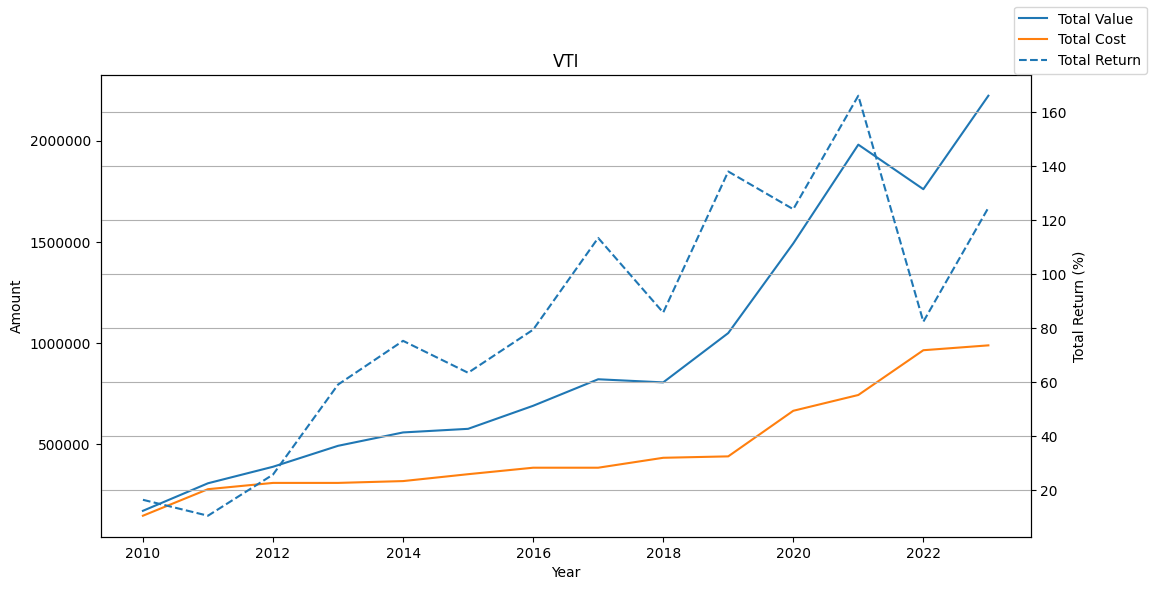

In [24]:
import matplotlib.pyplot as plt

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Total Value and Total Cost
ax1.plot(results['Year'], results['Total Value'], label='Total Value')
ax1.plot(results['Year'], results['Total Cost'], label='Total Cost')

# Setting the x-axis label and y-axis label for Total Value and Total Cost
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount')
ax1.ticklabel_format(style='plain')

# Creating the second y-axis for Total Return
ax2 = ax1.twinx()

# Plotting Total Return as a dashed line
ax2.plot(results['Year'], results['Total Return'], linestyle='--', label='Total Return')

# Setting the y-axis label for Total Return
ax2.set_ylabel('Total Return (%)')

# Setting the title
plt.title('VTI')

# Displaying the legend
fig.legend()
plt.grid(True)
# Displaying the graph
plt.show()


- - -

修改為VIX>30買入 VIX每增加5再買進

In [25]:
def calculate_strategy(VTI, VIX, buy_trigger, increment, buy_numbers=1000):
    # initialize variables
    total_cost = 0
    total_shares = 0
    total_value = 0
    annual_return = 0
    total_return = 0
    last_vix = 0
    last_year = VTI.index[0].year
    total_value_start = 0

    results = []

    # iterate over each day
    for i in range(len(VTI)):
        current_year = VTI.index[i].year

        # if VIX exceeds buy_trigger, buy VTI with buy_numbers
        if VIX[i] > buy_trigger:
            shares = buy_numbers / VTI[i]
            total_cost += buy_numbers
            total_shares += shares

            # double buy_numbers each time VIX increases
            if last_vix != 0 and VIX[i] - last_vix >= increment:
                #buy_numbers = buy_numbers + 1000
                shares = buy_numbers / VTI[i]
                total_cost += buy_numbers
                total_shares += shares

            last_vix = VIX[i]

        # if VIX returns to buy_trigger, reset for the next round
        elif VIX[i] <= buy_trigger:
            last_vix = 0

        # calculate total value, total cost, annual return, and total return
        total_value = total_shares * VTI[i]
        annual_return = ((total_value / total_value_start) - 1) * 100 if total_value_start != 0 else ((total_value - total_cost) / total_cost if total_cost != 0 else 0) * 100
        total_return = ((total_value - total_cost) / total_cost if total_cost != 0 else 0) * 100

        # if the year has changed, print and reset variables
        if current_year != last_year:
            results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])
            last_year = current_year
            total_value_start = total_value

    # add the results for the last year
    results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])

    return pd.DataFrame(results, columns=['Year', 'Total Value', 'Total Cost', 'Cumulative Shares', 'Annual Return', 'Total Return'])


In [26]:
# 假設你已經有VTI和VIX的DataFrame
VTI_prices = VTI['Close']
VIX_values = VIX['Close']

results = calculate_strategy(VTI_prices, VIX_values, 30, 5)

# 設定顯示選項
pd.set_option('display.float_format', '{:.2f}'.format)

results

,Year,Total Value,Total Cost,Cumulative Shares,Annual Return,Total Return
0,2010,29686.67,25000,452.54,18.75,18.75
1,2011,113166.50,103000,1735.42,281.20,9.87
2,2012,130399.18,103000,1735.42,15.23,26.60
3,2013,165003.39,103000,1735.42,26.54,60.20
4,2014,183815.30,103000,1735.42,11.40,78.46
5,2015,182461.65,107000,1775.96,-0.74,70.52
6,2016,206366.01,107000,1775.96,13.10,92.87
7,2017,245472.56,107000,1775.96,18.95,129.41
8,2018,232935.03,113000,1823.65,-5.11,106.14
9,2019,300866.04,113000,1823.65,29.16,166.25


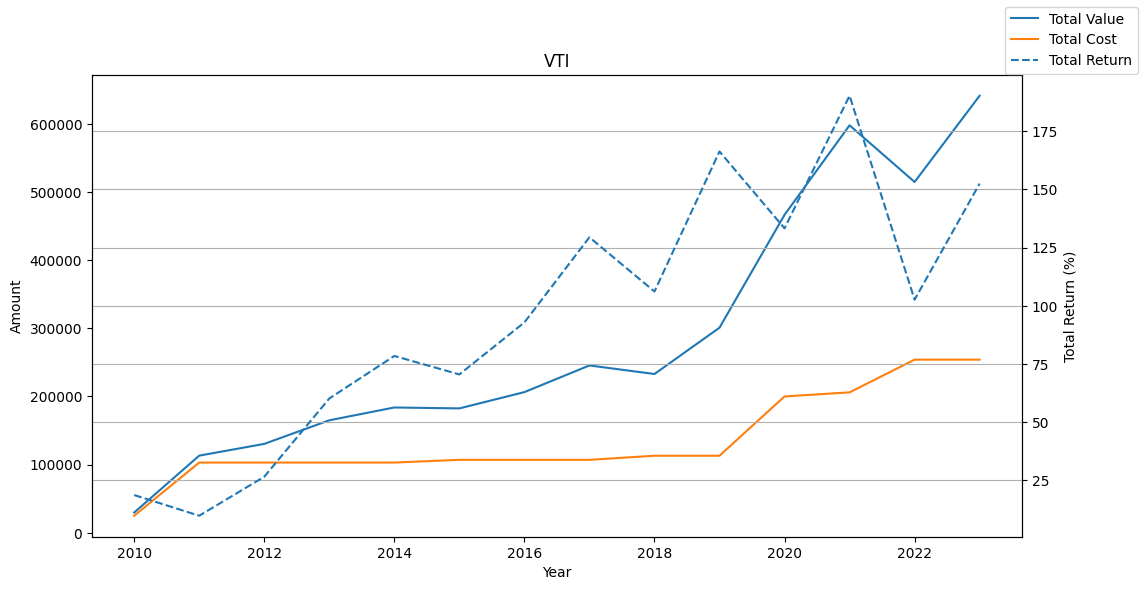

In [27]:
import matplotlib.pyplot as plt

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Total Value and Total Cost
ax1.plot(results['Year'], results['Total Value'], label='Total Value')
ax1.plot(results['Year'], results['Total Cost'], label='Total Cost')

# Setting the x-axis label and y-axis label for Total Value and Total Cost
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount')
ax1.ticklabel_format(style='plain')

# Creating the second y-axis for Total Return
ax2 = ax1.twinx()

# Plotting Total Return as a dashed line
ax2.plot(results['Year'], results['Total Return'], linestyle='--', label='Total Return')

# Setting the y-axis label for Total Return
ax2.set_ylabel('Total Return (%)')

# Setting the title
plt.title('VTI')

# Displaying the legend
fig.legend()
plt.grid(True)
# Displaying the graph
plt.show()


## QQQ

In [28]:
import yfinance as yf
VIX = yf.download('^VIX', start='2010-01-01',end='2023-12-31')
# 下載VTI的數據
QQQ = yf.download('QQQ', start='2010-01-01',end='2023-12-31')
QQQ

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,46.33,46.49,46.27,46.42,40.79,62822800
2010-01-05,46.39,46.50,46.16,46.42,40.79,62935600
2010-01-06,46.40,46.55,46.07,46.14,40.54,96033000
2010-01-07,46.21,46.27,45.92,46.17,40.57,77094100
2010-01-08,46.07,46.55,45.93,46.55,40.90,88886600
...,...,...,...,...,...,...
2023-12-22,409.00,409.97,406.48,408.38,408.17,34292400
2023-12-26,409.25,411.56,409.15,410.88,410.66,22722500
2023-12-27,410.95,411.79,410.08,411.50,411.50,31980500


In [29]:
# 假設你已經有VTI和VIX的DataFrame
QQQ_prices = QQQ['Close']
VIX_values = VIX['Close']

# 設定你的buy_trigger和increment
my_buy_trigger = 30
my_increment = 5

results = calculate_strategy(QQQ_prices, VIX_values, my_buy_trigger, my_increment)

# 設定顯示選項
pd.set_option('display.float_format', '{:.2f}'.format)

results

,Year,Total Value,Total Cost,Cumulative Shares,Annual Return,Total Return
0,2010,30845.53,25000,557.68,23.38,23.38
1,2011,113197.50,103000,1989.41,266.98,9.90
2,2012,133688.42,103000,1989.41,18.10,29.79
3,2013,173615.91,103000,1989.41,29.87,68.56
4,2014,204789.99,103000,1989.41,17.96,98.83
5,2015,222215.39,107000,2029.36,8.51,107.68
6,2016,242590.21,107000,2029.36,9.17,126.72
7,2017,321633.96,107000,2029.36,32.58,200.59
8,2018,320520.79,113000,2069.48,-0.35,183.65
9,2019,447338.42,113000,2069.48,39.57,295.87
